### Вы — аналитик крупного сервиса доставки еды. Вместе с отделом маркетинга вы провели эксперимент, который влияет на увеличение выручки.

    Вариант А: экран оплаты без рекламного предложения "Вам это пригодится" 
    Вариант Б: экран оплаты с рекламным предложением "Вам это пригодится"

### Вы провели A/B-тест и получили результаты, которые описаны в файлах orders.csv и visitors.csv.

Файл orders.csv. 

    transactionId — идентификатор заказа;
    visitorId — идентификатор пользователя, совершившего заказ;
    date — дата, когда был совершён заказ;
    revenue — выручка заказа;
    group — группа A/B-теста, в которую попал заказ.

Файл visitors.csv. Скачать датасет

    date — дата;
    group — группа A/B-теста;
    visitors — количество пользователей в указанную дату в указанной группе A/B-теста

Оцените результаты A/B-теста, сформулируйте вывод и добавьте рекомендации для отдела маркетинга.


## Выводы

### По данным аб-теста:

    1. После очистки данных средние чеки в двух группах отличались на 206 рублей: 6,299 рублей в тестовой группе (видели баннер) и 6505 в контрольной (не видели баннер).
    2. Анализ показал, что эта разница случайная. Значимой разницы средних чеков в двух группах, которые участвовали в эксперименте не обнаружила, поэтому мы не можем сказать, что наличие баннера в этом эксперименте повлияло на выручку. 
    3. 9 пользователей из 2 выборок я убрала, чтобы очистить выбрки от выбросов. Вот их ID и чеки, возможно, их стоит исследовать отдельно, потому что у них отличающийся покупательский паттерн. Возможно это ошибки. 
    
           visitorId	 revenue
    25	 148427295	 65710
    209	887908475	 60450
    211	888512513	 86620
    276	1164614297	66350
    309	1307669133	92550
    453	1920142716	1294500
    493	2108080724	202740
    956	4003628586	58550
    980	4133034833	67990

### О том, как спроектирован эксперимент: 


     1. Из-за того, что было выбрано решение по сплитованию пользователей на слишком раннем этапе (вероятно, захода на сайт/в приложение), мы на выходе получили данные неравномерного распределения пользователей по группам. 
    
        - в среднем количество наблюдений в выборках за каждый день разнятся в 1,3 раза 
        - из 30 дней только 7 показывают более-менее равномерное распределение наблюдений, поэтому я искусственно сократила и вычистила выборку. 
        
     2. По текущим данным мы не знаем, как пользователи распределялись по устройствам, а возможно и по сегментам b2b, b2c, потому что у нас большой разброс средних чеков даже после чистки от выбросов от 50 рублей до 50 тысяч рублей. В таких экспериментах мы будем видеть значимую разницу на маленьких чеках и почти не увидим разницу на больших. 
        
     3. По текущим результатам мы не знаем, какое количество пользователей взаимодействовали с баннером и изменилось ли что-то в их поведении после появления баннера: продолжили ли они покупки, зашли ли на сраницу с предложенным товаром. Эта информация будет ценной, если мы хотим исследовать новый маркетинговый инструмент. Текущие данные не позволяют нам понять, виделили пользователи баннер в принципе. 
        
     4. Если наша гипотеза в том, что средний чек вырастет за счет того, что пользователи будут использовать рекомендованное предложение. АБ-тест не выглядит оптимальным инструментом для оценки эффективность этого баннера. АБ-тест подошел бы, например, если бы мы тестировали на таком баннере разные тексты, а если наша задача понять, кликают ли на баннер и покупают ли после, нам нужно
        - выбрать целевые метрики, например, CTR и конверсию в покупку с баннера
        - оценить технические затраты на поддержку такой рекомендательной системы. Возможно, нам придется нанять для нее 2 новых датасайнтистов, а профит будет минимальным. 
        - определить какая конверсия в покупку с баннера окупает затраты
        - замерить метрики (возможно, воронку, если мы верим в эту гипотезу и готовы прокачивать результат на разных этапах воронки)


### Рекомендации для маркетинга:

    1. Выбрать другой способ проверки гипотезы о влиянии рекламного предложения "Вам это пригодится" на выручку. 
    2. Если есть возможность по итогам этого эксперимента получить больше данных о взаимодействии пользователя с баннером, использовать ее и проследить, как наличие баннера меняло поведение пользователя, в том числе чек корзины. 
    3. В будущем проектировании аб-тестов закладывать сплитование не только по группам, но и по устройствам, регионам (если есть), прошлому опыту в приложении. Это позволит сравнивать между собой более похожих и менее случайных пользователей. 

    
# Aнализ результатов АБ-теста

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_1samp, ttest_ind, norm,  t

In [2]:
visitors_by_day = pd.read_csv('visitors.csv', sep = ',')
visitors_by_day.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [3]:
visitors_by_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [4]:
visitors_by_day['date'] = pd.to_datetime(visitors_by_day['date'])

Посмотрим равномерность распределения пользователей по группам

In [5]:
# общее кол-во юзеров в каждой группе

visitors_by_day.groupby('group')['visitors'].sum()

group
A    18736
B    18916
Name: visitors, dtype: int64

In [6]:
control = visitors_by_day.loc[visitors_by_day['group'] == 'A']
test = visitors_by_day.loc[visitors_by_day['group'] == 'B']


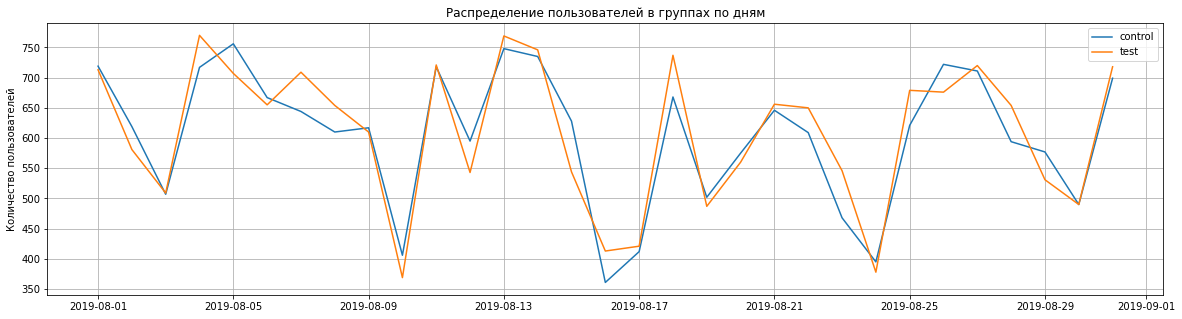

In [7]:
# распределение по дням

plt.figure(figsize=(20, 5))
plt.title('Распределение пользователей в группах по дням') 
plt.ylabel('Количество пользователей') 
plt.grid() 

plt.plot(control['date'], 
         control['visitors'],
         label = 'control') 
plt.plot(test['date'],
         test['visitors'],
         label = 'test') 

plt.legend()
plt.show() 

Если бы метрика, которую мы исследуем была привязана к заходу на сайт, с такими группами можно было бы работать, на глаз они достаточно сильно похожи. Но нам важно, как распределились пользователи уже в точке экперимента -- на экране оплаты. 

## Перейдем к проверке данных самого теста

In [8]:
orders = pd.read_csv('orders.csv', sep = ',')
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [9]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [10]:
# переведу даты в формат datetime

orders['date'] = pd.to_datetime(orders['date'])

Проверим качество распределения:
    
Частая проблема, что одни и те же пользователи несколько раз в разные группы

In [11]:
user_by_group = orders.groupby('visitorId')['group'].nunique().reset_index()
users_for_cleaning = user_by_group.loc[user_by_group['group'] > 1].count()

#посмотрим в процентах, сколько дублей
users_for_cleaning['visitorId']/orders['visitorId'].count()

0.04845446950710108

5% пользователей попали в обе группы. Для чистоты эксперимента стоит их удалить.

In [12]:
#выберу только подходящих юзеров

users_one_group = user_by_group.loc[user_by_group['group'] == 1]
#users_one_group 

In [13]:
# с помощью списака подходящих юзеров отфильтрую датасет теста

clean_orders = pd.merge(users_one_group, orders,
      how = 'left',
      left_on = 'visitorId', right_on = 'visitorId')
#clean_orders

In [14]:
# выберу отдельно тестовую и контрольную группу, чтобы дальше анализировать эти выборки

cntrl = clean_orders.loc[clean_orders['group_y'] == 'A']
tst = clean_orders.loc[clean_orders['group_y'] == 'B']

In [15]:
cntrl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 468 entries, 2 to 1012
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   visitorId      468 non-null    int64         
 1   group_x        468 non-null    int64         
 2   transactionId  468 non-null    int64         
 3   date           468 non-null    datetime64[ns]
 4   revenue        468 non-null    int64         
 5   group_y        468 non-null    object        
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 25.6+ KB


In [16]:
#посмотрим распределение по дням

cntrl_count = cntrl.groupby(cntrl['date'].dt.day).transactionId.count()
tst_count = tst.groupby(tst['date'].dt.day).transactionId.count()

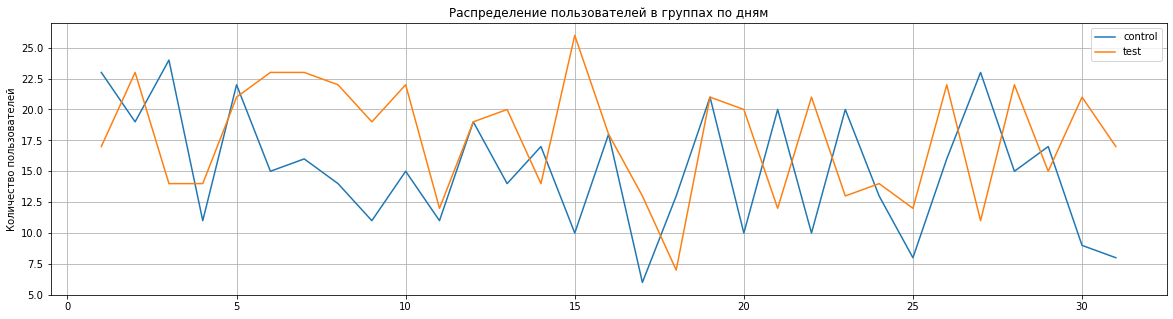

In [17]:
# распределение по дням пользователей в группах

plt.figure(figsize=(20, 5))
plt.title('Распределение пользователей в группах по дням') 
plt.ylabel('Количество пользователей') 
plt.grid() 

plt.plot(cntrl_count,
         label = 'control') 
plt.plot(tst_count,
         label = 'test') 

plt.legend()
plt.show() 

### Очень плохо выглядит распределение по дням. 

Судя по всему, распределение пользователей в этот тест происходило не на этапе экрана оплаты, на на этапе захода на сайт. И это не обеспечило ежедневную единообразность выборок.

Есть два способа:
1. Перезапустить тест с другим алгоритмом сплитования
2. Почистить текущие данные и попробовать на них сделать выводы

Дальнейшие выводы по тесту должны обязательно быть с оговоркой, что распределение пользователей между группами неравномерное и мы колдуем, чтобы это исправить. 

In [18]:
# в среднем количество наблюдений в выборках за каждый день разнятся в 1,5 раза, 
# из 30 дней только 7 показывают более-менее равномерное распределение наблюдений 

diff = tst_count/cntrl_count
diff.mean()

1.3139399720618594

## Посмотрим на средний чек, ведь именно его увеличение мы и проверяем экспериментом

Посмотрим, как распределились данные чеков, нет ли выбросов

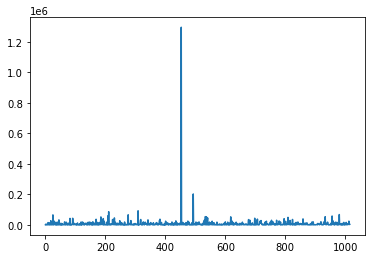

In [19]:
clean_orders['revenue'].plot()  # Достаточно примитивного графика, чтобы увидеть 2 оплаты, которые очень сильно выбиваются

In [20]:
# посмотрим на них

clean_orders.sort_values(by = 'revenue').tail()

,visitorId,group_x,transactionId,date,revenue,group_y
980,4133034833,1,3603576309,2019-08-09,67990,A
211,888512513,1,3668308183,2019-08-27,86620,B
309,1307669133,1,666610489,2019-08-13,92550,A
493,2108080724,1,3936777065,2019-08-15,202740,B
453,1920142716,1,590470918,2019-08-19,1294500,B


Я думаю, что лучше убрать их из анализа, потому что единичные значения в сотню раз отличающиеся от средних добавляют слишком много шума в десперсию

Для больше честности, я хочу корректировать не отдельные значения, а все данные эксперимента. В нашем случае я хочу отрезать 1% выбивающихся значений из обеих выборок. 

In [21]:
# Возьму для этого 99 персентиль

perc_99 = np.percentile(clean_orders['revenue'], 99)
perc_99

53904.0

In [22]:
# посмотрим, какие значения ушли из выборок и как они распределены. 
# Нет ли такого, что все крупные значения в одной выборке

clean_orders.loc[clean_orders['revenue'] > perc_99]

,visitorId,group_x,transactionId,date,revenue,group_y
25,148427295,1,316924019,2019-08-12,65710,A
209,887908475,1,1347999392,2019-08-21,60450,A
211,888512513,1,3668308183,2019-08-27,86620,B
276,1164614297,1,1348774318,2019-08-12,66350,A
309,1307669133,1,666610489,2019-08-13,92550,A
453,1920142716,1,590470918,2019-08-19,1294500,B
493,2108080724,1,3936777065,2019-08-15,202740,B
956,4003628586,1,2420050534,2019-08-08,58550,B
980,4133034833,1,3603576309,2019-08-09,67990,A


In [23]:
clean_orders[['visitorId', 'revenue']].loc[clean_orders['revenue'] > perc_99]

,visitorId,revenue
25,148427295,65710
209,887908475,60450
211,888512513,86620
276,1164614297,66350
309,1307669133,92550
453,1920142716,1294500
493,2108080724,202740
956,4003628586,58550
980,4133034833,67990


In [24]:
# оставляем в столбце с чеками только значения, входящие в 99%

tst['revenue'] = tst['revenue'].loc[tst['revenue'] <= perc_99]
cntrl['revenue'] = cntrl['revenue'].sort_values().loc[cntrl['revenue'] <= perc_99]

<ipython-input-24-7a66fd89703c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tst['revenue'] = tst['revenue'].loc[tst['revenue'] <= perc_99]
<ipython-input-24-7a66fd89703c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cntrl['revenue'] = cntrl['revenue'].sort_values().loc[cntrl['revenue'] <= perc_99]


In [25]:
# удаляем строки, где встречаются наши 9 выбросов

cntrl.dropna(inplace = True)
tst.dropna(inplace = True)

<ipython-input-25-a053d001fe33>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cntrl.dropna(inplace = True)
<ipython-input-25-a053d001fe33>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tst.dropna(inplace = True)


Наши выборки готовы, нет выбросов и дублей. 

In [26]:
cntrl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 463 entries, 2 to 1012
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   visitorId      463 non-null    int64         
 1   group_x        463 non-null    int64         
 2   transactionId  463 non-null    int64         
 3   date           463 non-null    datetime64[ns]
 4   revenue        463 non-null    float64       
 5   group_y        463 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 25.3+ KB


In [27]:
tst.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 544 entries, 0 to 1015
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   visitorId      544 non-null    int64         
 1   group_x        544 non-null    int64         
 2   transactionId  544 non-null    int64         
 3   date           544 non-null    datetime64[ns]
 4   revenue        544 non-null    float64       
 5   group_y        544 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 29.8+ KB


### Уравняем выборки по дням

Так как сравнивать выборки с разной динамикой набора противоречит правилам аб-теста, есть идея уравнять выборки, взяв из каждой случайное количество минимальных наблюдений за каждый день. 


In [28]:
# возьму уникальный набор дат
date_unique = set(cntrl['date'].values)

# два списка, в которые буду собирать итоговые значения ретеншнов.
reduset_ctrl_lst = np.array([])
reduset_tst_lst = np.array([])
sum_date = 0

# заведу цикл, который обрабатывает каждую дату
for i in date_unique:
    i_date_ctrl = cntrl.loc[cntrl['date'] == i]
    i_date_tst = tst.loc[tst['date'] == i]
    i_date_ctrl.count()
    
# посмотрим, какая из выборок дала меньшее количество наблюдений за каждый день   
    min_date = min(i_date_ctrl['transactionId'].count(), i_date_tst['transactionId'].count())    

# в каждый список положим то, количество случайных значений из выборки на дату,
# которое соответствует минимальному количеству наблюдений из двух выборок.
    reduset_ctrl = cntrl.loc[cntrl['date'] == i].sample(min_date)['revenue']
#     print(reduset_ctrl)
    reduset_ctrl_lst = np.append(reduset_ctrl,reduset_ctrl_lst)
    reduset_tst = tst.loc[tst['date'] == i].sample(min_date)['revenue']
#     print(reduset_tst)
    reduset_tst_lst = np.append(reduset_tst,reduset_tst_lst)
    
# проверим, что наши выборки равны
print(len(reduset_ctrl_lst))
print(len(reduset_tst_lst))



    

407
407


Посмотрим снова на основные статистики двух выборок, обрезав 1% всех выбросов эксперимента

In [29]:
# вернет значения статистик в удобном формате

pd.options.display.float_format = '{:,.4f}'.format

In [30]:
tst['revenue'].agg(['mean', 'std', 'max', 'min'])

mean    6,298.8272
std     8,519.5793
max    53,904.0000
min        50.0000
Name: revenue, dtype: float64

In [31]:
cntrl['revenue'].agg(['mean', 'std', 'max', 'min'])

mean    6,504.5486
std     8,945.4322
max    53,904.0000
min        50.0000
Name: revenue, dtype: float64

Средний чек тестовой выборки ниже, это уже не позволяет отвергнуть нулевую гипотезу о том, что изменение на сайте не приведет к значимому увеличению чека.

Но ничто не мешает нам проверить статзначимость текущей разницы. Действительно ли нововведение ухудшает средний чек. 

Посмотрим, как теперь выглядят распределения

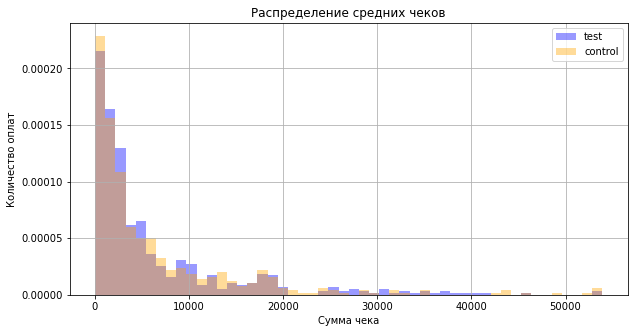

In [32]:
plt.figure(figsize=(10, 5))
plt.title('Распределение средних чеков') 
plt.xlabel('Сумма чека') 
plt.ylabel('Количество оплат') 

plt.grid()

plt.hist(tst['revenue'], 
         density=True,
         alpha = 0.4, 
         bins=50, 
         color = 'blue',
        label = 'test') 
plt.hist(cntrl['revenue'], 
         density=True,
         alpha = 0.4, 
         bins=50, 
         color = 'orange',
        label = 'control')

plt.legend()
plt.show()

# Анализ с уравненными выборками

Для сравнения средних чеков я возьму метод бутстрап. 

Он хорошо подходит для недискретных метрик с большим разбросом, как в нашем случае

Сейчас мы будем передавать в критерий не полные выборки, а те, что подготовили чуть выше, где на каждый день в обеих группах одинаковое количество наблюдений.

In [33]:
!pip install bootstrapped

In [34]:
# импортируем необходимые модули
import bootstrapped.bootstrap as bs
import bootstrapped.stats_functions as bs_stats
import bootstrapped.compare_functions as bs_compare

In [35]:
# reduset_ctrl_lst = reduset_ctrl_lst[np.logical_not(np.isnan(reduset_ctrl_lst))]
# reduset_tst_lst = reduset_tst_lst[np.logical_not(np.isnan(reduset_tst_lst))]

Посмотрим на распределение уравненных выборок

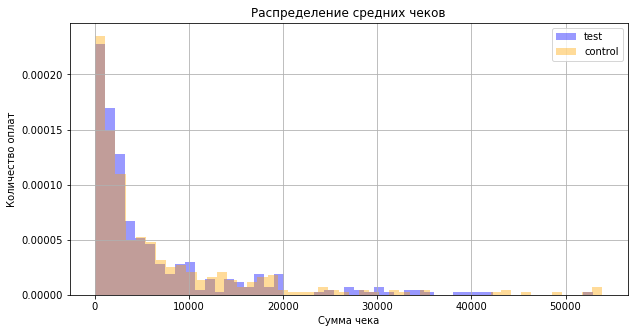

In [36]:
plt.figure(figsize=(10, 5))
plt.title('Распределение средних чеков') 
plt.xlabel('Сумма чека') 
plt.ylabel('Количество оплат') 

plt.grid()

plt.hist(reduset_tst_lst, 
         density=True,
         alpha = 0.4, 
         bins = 50, 
         color = 'blue',
        label = 'test') 
plt.hist(reduset_ctrl_lst, 
         density=True,
         alpha = 0.4, 
         bins=50, 
         color = 'orange',
        label = 'control')

plt.legend()
plt.show()

In [37]:
??bs.bootstrap_ab

In [38]:
boot_results = bs.bootstrap_ab(test = reduset_tst_lst, ctrl = reduset_ctrl_lst
                              , stat_func = bs_stats.mean
                              , compare_func = bs_compare.difference
                              , return_distribution=True)

Я возьму двусоронний критерий с точностью в 5%

In [39]:
borders = np.percentile(boot_results, [2.5, 97.5]) # считаем перцентили
borders

array([-1878.40995086,   536.24238329])

Уже по границам видно, что ноль попадает в доверительный интервал, но посмотрим распределение на графике, так нагляднее

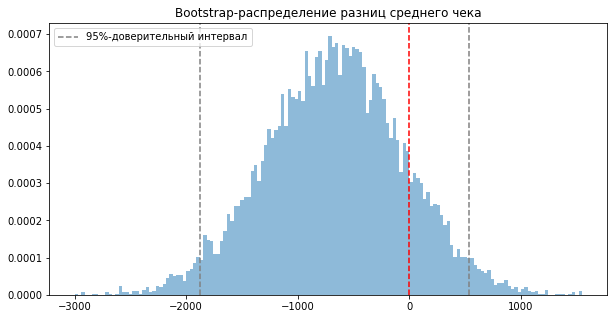

In [40]:
plt.figure(figsize=(10, 5))
plt.title('Bootstrap-распределение разниц среднего чека')
plt.hist(boot_results,
        density=True,
        bins = 150,
        alpha = 0.5) 
plt.axvline(0, # отрисуем на графике ноль
           ymin = 0, 
           ymax = 1, 
           linestyle= '--', 
           color = 'red')
plt.axvline(borders[0], # отрисуем перцентиль
           ymin = 0, 
           ymax = 1, 
           linestyle= '--', 
           color = 'grey', 
           label = '95%-доверительный интервал')
plt.axvline(borders[1], # отрисуем перцентиль
           ymin = 0, 
           ymax = 1, 
           linestyle= '--', 
           color = 'grey')
plt.legend()
plt.show()

Ноль внутри доверительного интервала, значит мы не можем говорить о статзначимости разницы в средних чеках двух выборок. 

# Я еще и конверсии считала зачем-то, пока оставлю

Посчитаю конверсию в контрольной группе

In [41]:
# сгруппирую по дням количество заказов

cntrl_count_trans = cntrl.groupby(cntrl['date'].dt.day)['transactionId'].count().reset_index()
cntrl_count_trans.head()

,date,transactionId
0,1,23
1,2,19
2,3,24
3,4,11
4,5,22


In [42]:
# сджойню заказы и визиты

full_data_cntrl = pd.merge(control, cntrl_count_trans,
      left_index=True, right_index=True)
full_data_cntrl.head()

,date_x,group,visitors,date_y,transactionId
0,2019-08-01,A,719,1,23
1,2019-08-02,A,619,2,19
2,2019-08-03,A,507,3,24
3,2019-08-04,A,717,4,11
4,2019-08-05,A,756,5,22


In [43]:
# посчитаю конверсию

full_data_cntrl['convertion'] = full_data_cntrl['transactionId']/full_data_cntrl['visitors']
full_data_cntrl.head()

,date_x,group,visitors,date_y,transactionId,convertion
0,2019-08-01,A,719,1,23,0.0320
1,2019-08-02,A,619,2,19,0.0307
2,2019-08-03,A,507,3,24,0.0473
3,2019-08-04,A,717,4,11,0.0153
4,2019-08-05,A,756,5,22,0.0291


Все то же самое проделаю для тестовой группы

In [44]:
# сгруппирую по дням количество заказов
tst_count_trans = tst.groupby( tst['date'].dt.day)['transactionId'].count().reset_index()
tst_count_trans.head()

# обновлю индексы, чтобы они шли с 0
test.reset_index(inplace = True)

# сджойню заказы и визиты
full_data_tst = pd.merge(test, tst_count_trans,
      left_index=True, right_index=True)
full_data_tst.head()

# посчитаю конверсию
full_data_tst['convertion'] = full_data_tst['transactionId']/full_data_tst['visitors']
full_data_tst.head()

,index,date_x,group,visitors,date_y,transactionId,convertion
0,31,2019-08-01,B,713,1,17,0.0238
1,32,2019-08-02,B,581,2,23,0.0396
2,33,2019-08-03,B,509,3,14,0.0275
3,34,2019-08-04,B,770,4,14,0.0182
4,35,2019-08-05,B,707,5,21,0.0297


Посмотрим основные статистики по выборкам

In [45]:
full_data_tst.describe()

,index,visitors,date_y,transactionId,convertion
count,31.0000,31.0000,31.0000,31.0000,31.0000
mean,46.0000,610.1935,16.0000,17.5484,0.0302
std,9.0921,118.1562,9.0921,4.5959,0.0107
min,31.0000,369.0000,1.0000,7.0000,0.0095
25%,38.5000,537.0000,8.5000,14.0000,0.0237
50%,46.0000,654.0000,16.0000,19.0000,0.0311
75%,53.5000,711.0000,23.5000,21.0000,0.0354
max,61.0000,770.0000,31.0000,25.0000,0.0596


In [46]:
full_data_cntrl.describe()

,visitors,date_y,transactionId,convertion
count,31.0000,31.0000,31.0000,31.0000
mean,604.3871,16.0000,14.9355,0.0256
std,112.3962,9.0921,4.9459,0.0103
min,361.0000,1.0000,6.0000,0.0114
25%,541.0000,8.5000,10.5000,0.0169
50%,619.0000,16.0000,15.0000,0.0231
75%,705.0000,23.5000,18.5000,0.0313
max,756.0000,31.0000,24.0000,0.0499


заведу переменные для средних

In [47]:
tst_mean = full_data_tst['convertion'].mean()
tst_mean

0.030204339441940675

In [48]:
cntrl_mean = full_data_cntrl['convertion'].mean()
cntrl_mean

0.02563653353637501

Посмотрю визуально, как распределились конверсии

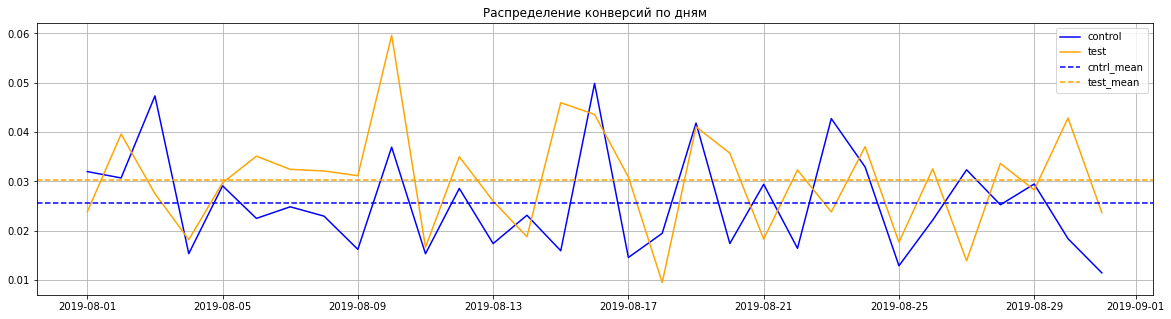

In [49]:

plt.figure(figsize=(20, 5))
plt.title('Распределение конверсий по дням') 
plt.grid() 

plt.plot(full_data_cntrl['date_x'], 
         full_data_cntrl['convertion'],
         color = 'blue',
         label = 'control') 
plt.plot(full_data_tst['date_x'],
         full_data_tst['convertion'],
          color = 'orange', 
         label = 'test') 
plt.axhline(cntrl_mean, # отрисуем перцентили
           xmin = 0, 
           xmax = 1, 
           color = 'blue',
           ls = '--',
           label = 'cntrl_mean')
plt.axhline(tst_mean, # отрисуем перцентили
           xmin = 0, 
           xmax = 1, 
            ls = '--',
            color = 'orange',
            label = 'test_mean')

plt.legend()
plt.show() 